In [1]:
%cd ../

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.tardb as tardb
import htfa_torch.utils as utils

from ordered_set import OrderedSet
import itertools
import torch

In [3]:
%matplotlib inline

In [4]:
PREFIX = 'avfp_memory_p5p51'

In [5]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [6]:
affvids_db = tardb.FmriTarDataset('data/avfp_memory_mini.tar')

In [7]:
dtfa = DTFA.DeepTFA(affvids_db, num_factors=100, embedding_dim=2)

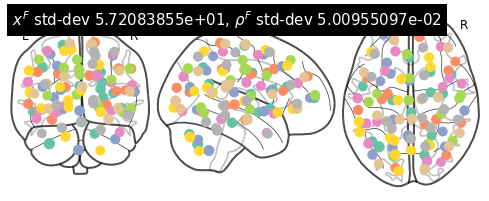

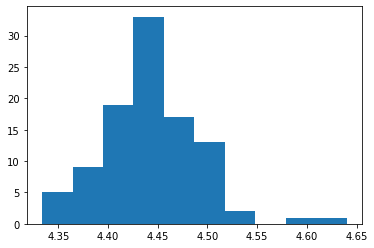

(<nilearn.plotting.displays.OrthoProjector at 0x7f2aa0e1dee0>,
 tensor([[ 22.7167, -53.6097,  23.5313],
         [ 21.3226,  13.3966,  17.6763],
         [-49.5932,  -1.7929,  -6.3694],
         [-32.4893, -65.4800, -40.1911],
         [-18.3203, -16.2608,  63.7130],
         [-39.6857, -59.9281,  40.5782],
         [ 43.5103,  10.5285,  -2.4946],
         [ 15.2515, -74.2273, -29.4934],
         [ 34.8172,  -9.5777,  13.1366],
         [ -0.7767,  28.4325,  20.5837],
         [ 21.7221,  -8.1795,  35.0465],
         [ 24.1767,  57.2205,   8.5469],
         [  1.3096, -29.4180, -17.3938],
         [-15.3207, -87.6291,  19.2803],
         [-23.2916,  -9.6490,  33.4934],
         [ 15.3322, -41.8600,  66.5244],
         [ 27.7300, -36.5380,   0.7989],
         [-54.5692, -26.7300,   1.7023],
         [-29.6226, -15.1070, -14.7421],
         [ 53.6859, -39.9418,  38.8484],
         [ 38.2675, -74.2161,  15.1114],
         [-44.8060,   7.7126,  35.2493],
         [  9.8970,  50.1059,  31.3

In [8]:
dtfa.visualize_factor_embedding()

In [9]:
dtfa.num_blocks

144

In [10]:
dtfa.num_voxels

175987

In [11]:
dtfa.tasks()

['Heights_b_3.mov',
 'Heights_b_4.mp4',
 'Spiders_b_4.m4v',
 'Spiders_b_1.m4v',
 'Heights_b_2.m4v',
 'Heights_b_1.mp4',
 'Social_b_2.mov',
 'Social_a_2.m4v',
 'Social_a_4.mp4',
 'Social_b_4.mov',
 'Spiders_b_3.mov',
 'Spiders_b_2.mp4',
 'Spiders_a_1.m4v',
 'Social_b_3.mp4',
 'Spiders_a_4.mov',
 'Heights_a_1.mp4',
 'Spiders_a_3.m4v',
 'Heights_a_2.m4v',
 'Heights_a_3.mp4',
 'Social_a_3.mp4',
 'Social_b_1.mp4',
 'Social_a_1.mp4',
 'Heights_a_4.mp4',
 'Spiders_a_2.mp4']

In [12]:
dtfa.subjects()

[150, 158, 159, 161, 166, 169]

In [13]:
losses = dtfa.train(num_steps=500, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=80, use_cuda=True, checkpoint_steps=100, patience=500,
                    blocks_filter=affvids_db.inference_filter(training=True), l_p=0.5, l_s=0.5, l_i=1)

10/20/2021 13:25:29 [Epoch 1] (48875ms) ELBO -3.73492668e+10 = log-likelihood -3.73468644e+10 - KL from prior 2.39695304e+06, P weight penalty 3.22192080e+03, S weight penalty 2.45526549e+03, I weight penalty 2.39933580e+03
10/20/2021 13:25:29 Saving checkpoint...
10/20/2021 13:25:36 [Epoch 2] (6765ms) ELBO -3.63279142e+10 = log-likelihood -3.63256131e+10 - KL from prior 2.29648642e+06, P weight penalty 2.76644990e+03, S weight penalty 2.08754313e+03, I weight penalty 2.29454600e+03
10/20/2021 13:25:43 [Epoch 3] (6814ms) ELBO -3.56801441e+10 = log-likelihood -3.56779261e+10 - KL from prior 2.21481343e+06, P weight penalty 2.19267138e+03, S weight penalty 1.89741625e+03, I weight penalty 2.19533685e+03
10/20/2021 13:25:49 [Epoch 4] (6735ms) ELBO -3.52055857e+10 = log-likelihood -3.52034434e+10 - KL from prior 2.13890302e+06, P weight penalty 2.24238989e+03, S weight penalty 1.72137695e+03, I weight penalty 2.10118783e+03
10/20/2021 13:25:56 [Epoch 5] (6793ms) ELBO -3.48713608e+10 = log-

10/20/2021 13:29:41 [Epoch 38] (7007ms) ELBO -2.87683444e+10 = log-likelihood -2.87676973e+10 - KL from prior 6.47041869e+05, P weight penalty 6.14922549e+02, S weight penalty 5.97989007e+02, I weight penalty 6.86497797e+02
10/20/2021 13:29:48 [Epoch 39] (7016ms) ELBO -2.86952710e+10 = log-likelihood -2.86946226e+10 - KL from prior 6.48549748e+05, P weight penalty 6.15667398e+02, S weight penalty 6.13513270e+02, I weight penalty 6.89840222e+02
10/20/2021 13:29:55 [Epoch 40] (6789ms) ELBO -2.86191546e+10 = log-likelihood -2.86185028e+10 - KL from prior 6.51684396e+05, P weight penalty 5.46008913e+02, S weight penalty 6.25254359e+02, I weight penalty 6.93712309e+02
10/20/2021 13:30:02 [Epoch 41] (6973ms) ELBO -2.85518561e+10 = log-likelihood -2.85512011e+10 - KL from prior 6.54984423e+05, P weight penalty 5.89348763e+02, S weight penalty 6.74665640e+02, I weight penalty 6.99530431e+02
10/20/2021 13:30:09 [Epoch 42] (6827ms) ELBO -2.84932358e+10 = log-likelihood -2.84925764e+10 - KL from 

10/20/2021 13:33:53 [Epoch 75] (6786ms) ELBO -2.75000891e+10 = log-likelihood -2.74992824e+10 - KL from prior 8.06875382e+05, P weight penalty 4.78935525e+02, S weight penalty 7.96441303e+02, I weight penalty 7.64396152e+02
10/20/2021 13:34:00 [Epoch 76] (6790ms) ELBO -2.74845118e+10 = log-likelihood -2.74837002e+10 - KL from prior 8.11587323e+05, P weight penalty 5.13914960e+02, S weight penalty 7.84007028e+02, I weight penalty 7.62226775e+02
10/20/2021 13:34:06 [Epoch 77] (6790ms) ELBO -2.74714316e+10 = log-likelihood -2.74706166e+10 - KL from prior 8.14780158e+05, P weight penalty 4.83736146e+02, S weight penalty 7.71821871e+02, I weight penalty 7.60056643e+02
10/20/2021 13:34:13 [Epoch 78] (6795ms) ELBO -2.74546180e+10 = log-likelihood -2.74538002e+10 - KL from prior 8.17777114e+05, P weight penalty 4.56439476e+02, S weight penalty 8.19045434e+02, I weight penalty 7.57934600e+02
10/20/2021 13:34:20 [Epoch 79] (6787ms) ELBO -2.74366620e+10 = log-likelihood -2.74358403e+10 - KL from 

10/20/2021 13:38:07 [Epoch 112] (7050ms) ELBO -2.71189748e+10 = log-likelihood -2.71180598e+10 - KL from prior 9.14802218e+05, P weight penalty 4.15283352e+02, S weight penalty 1.02884022e+03, I weight penalty 6.44937271e+02
10/20/2021 13:38:14 [Epoch 113] (6831ms) ELBO -2.71091482e+10 = log-likelihood -2.71082315e+10 - KL from prior 9.16791233e+05, P weight penalty 4.51480507e+02, S weight penalty 9.99584602e+02, I weight penalty 6.40861892e+02
10/20/2021 13:38:21 [Epoch 114] (6790ms) ELBO -2.71059090e+10 = log-likelihood -2.71049900e+10 - KL from prior 9.19045287e+05, P weight penalty 4.30897849e+02, S weight penalty 1.01440883e+03, I weight penalty 6.35989932e+02
10/20/2021 13:38:28 [Epoch 115] (6971ms) ELBO -2.70988889e+10 = log-likelihood -2.70979680e+10 - KL from prior 9.20656768e+05, P weight penalty 4.55192362e+02, S weight penalty 9.77215394e+02, I weight penalty 6.33365691e+02
10/20/2021 13:38:35 [Epoch 116] (6762ms) ELBO -2.70949521e+10 = log-likelihood -2.70940287e+10 - KL 

10/20/2021 13:42:22 [Epoch 149] (6934ms) ELBO -2.69365993e+10 = log-likelihood -2.69356087e+10 - KL from prior 9.90527949e+05, P weight penalty 4.40484689e+02, S weight penalty 1.09089556e+03, I weight penalty 5.14696314e+02
10/20/2021 13:42:28 [Epoch 150] (6829ms) ELBO -2.69325855e+10 = log-likelihood -2.69315925e+10 - KL from prior 9.92949755e+05, P weight penalty 4.13204354e+02, S weight penalty 1.08136313e+03, I weight penalty 5.10433002e+02
10/20/2021 13:42:35 [Epoch 151] (6803ms) ELBO -2.69271992e+10 = log-likelihood -2.69262047e+10 - KL from prior 9.94181116e+05, P weight penalty 4.77810925e+02, S weight penalty 1.11174900e+03, I weight penalty 5.08877735e+02
10/20/2021 13:42:42 [Epoch 152] (6779ms) ELBO -2.69260167e+10 = log-likelihood -2.69250213e+10 - KL from prior 9.95291173e+05, P weight penalty 4.55453665e+02, S weight penalty 1.08658734e+03, I weight penalty 5.03788126e+02
10/20/2021 13:42:49 [Epoch 153] (6804ms) ELBO -2.69212466e+10 = log-likelihood -2.69202488e+10 - KL 

10/20/2021 13:46:34 [Epoch 186] (6865ms) ELBO -2.68350265e+10 = log-likelihood -2.68339748e+10 - KL from prior 1.05175346e+06, P weight penalty 4.42355652e+02, S weight penalty 1.16858284e+03, I weight penalty 4.09606065e+02
10/20/2021 13:46:41 [Epoch 187] (7036ms) ELBO -2.68302323e+10 = log-likelihood -2.68291790e+10 - KL from prior 1.05325665e+06, P weight penalty 4.70299684e+02, S weight penalty 1.17171264e+03, I weight penalty 4.05987522e+02
10/20/2021 13:46:48 [Epoch 188] (7036ms) ELBO -2.68327762e+10 = log-likelihood -2.68317221e+10 - KL from prior 1.05409310e+06, P weight penalty 4.60048541e+02, S weight penalty 1.17117710e+03, I weight penalty 4.04421650e+02
10/20/2021 13:46:55 [Epoch 189] (6892ms) ELBO -2.68287938e+10 = log-likelihood -2.68277380e+10 - KL from prior 1.05590742e+06, P weight penalty 4.15983555e+02, S weight penalty 1.17638385e+03, I weight penalty 4.00716149e+02
10/20/2021 13:47:02 [Epoch 190] (6816ms) ELBO -2.68304710e+10 = log-likelihood -2.68294144e+10 - KL 

10/20/2021 13:50:52 [Epoch 223] (6843ms) ELBO -2.67616523e+10 = log-likelihood -2.67605509e+10 - KL from prior 1.10130127e+06, P weight penalty 5.44756632e+02, S weight penalty 1.23229431e+03, I weight penalty 3.26239744e+02
10/20/2021 13:50:58 [Epoch 224] (6798ms) ELBO -2.67605985e+10 = log-likelihood -2.67594960e+10 - KL from prior 1.10258719e+06, P weight penalty 4.99775369e+02, S weight penalty 1.25178806e+03, I weight penalty 3.23020842e+02
10/20/2021 13:51:05 [Epoch 225] (6795ms) ELBO -2.67589622e+10 = log-likelihood -2.67578582e+10 - KL from prior 1.10412110e+06, P weight penalty 5.08026821e+02, S weight penalty 1.25063982e+03, I weight penalty 3.20540607e+02
10/20/2021 13:51:12 [Epoch 226] (6798ms) ELBO -2.67581072e+10 = log-likelihood -2.67570033e+10 - KL from prior 1.10408088e+06, P weight penalty 5.10844090e+02, S weight penalty 1.23578483e+03, I weight penalty 3.18941247e+02
10/20/2021 13:51:19 [Epoch 227] (6799ms) ELBO -2.67564016e+10 = log-likelihood -2.67552946e+10 - KL 

10/20/2021 13:55:03 [Epoch 260] (6784ms) ELBO -2.67123303e+10 = log-likelihood -2.67111873e+10 - KL from prior 1.14291142e+06, P weight penalty 5.31408394e+02, S weight penalty 1.32021654e+03, I weight penalty 2.59944353e+02
10/20/2021 13:55:10 [Epoch 261] (6745ms) ELBO -2.67109783e+10 = log-likelihood -2.67098337e+10 - KL from prior 1.14451401e+06, P weight penalty 5.45764040e+02, S weight penalty 1.29359690e+03, I weight penalty 2.59619250e+02
10/20/2021 13:55:16 [Epoch 262] (6732ms) ELBO -2.67094970e+10 = log-likelihood -2.67083513e+10 - KL from prior 1.14570687e+06, P weight penalty 5.41622371e+02, S weight penalty 1.31803607e+03, I weight penalty 2.58179038e+02
10/20/2021 13:55:23 [Epoch 263] (6732ms) ELBO -2.67075915e+10 = log-likelihood -2.67064441e+10 - KL from prior 1.14729771e+06, P weight penalty 5.54590764e+02, S weight penalty 1.30456238e+03, I weight penalty 2.55790174e+02
10/20/2021 13:55:30 [Epoch 264] (6903ms) ELBO -2.67072380e+10 = log-likelihood -2.67060910e+10 - KL 

10/20/2021 13:59:17 [Epoch 297] (6871ms) ELBO -2.66788010e+10 = log-likelihood -2.66776220e+10 - KL from prior 1.17895977e+06, P weight penalty 5.86511775e+02, S weight penalty 1.38168415e+03, I weight penalty 2.14312590e+02
10/20/2021 13:59:23 [Epoch 298] (6772ms) ELBO -2.66792043e+10 = log-likelihood -2.66780246e+10 - KL from prior 1.17968003e+06, P weight penalty 5.69255555e+02, S weight penalty 1.35718003e+03, I weight penalty 2.11573396e+02
10/20/2021 13:59:30 [Epoch 299] (6910ms) ELBO -2.66815244e+10 = log-likelihood -2.66803435e+10 - KL from prior 1.18076723e+06, P weight penalty 5.77253320e+02, S weight penalty 1.34490814e+03, I weight penalty 2.12271715e+02
10/20/2021 13:59:37 [Epoch 300] (6859ms) ELBO -2.66803200e+10 = log-likelihood -2.66791380e+10 - KL from prior 1.18215480e+06, P weight penalty 6.03831162e+02, S weight penalty 1.35798320e+03, I weight penalty 2.11831451e+02
10/20/2021 13:59:44 [Epoch 301] (6787ms) ELBO -2.66820139e+10 = log-likelihood -2.66808317e+10 - KL 

10/20/2021 14:03:29 [Epoch 334] (7060ms) ELBO -2.66505102e+10 = log-likelihood -2.66492988e+10 - KL from prior 1.21106951e+06, P weight penalty 6.26802652e+02, S weight penalty 1.43128913e+03, I weight penalty 1.84662074e+02
10/20/2021 14:03:36 [Epoch 335] (7035ms) ELBO -2.66491775e+10 = log-likelihood -2.66479652e+10 - KL from prior 1.21245712e+06, P weight penalty 6.19190454e+02, S weight penalty 1.40227816e+03, I weight penalty 1.82156184e+02
10/20/2021 14:03:43 [Epoch 336] (6965ms) ELBO -2.66483406e+10 = log-likelihood -2.66471279e+10 - KL from prior 1.21271536e+06, P weight penalty 5.92579578e+02, S weight penalty 1.42339965e+03, I weight penalty 1.80985933e+02
10/20/2021 14:03:50 [Epoch 337] (6796ms) ELBO -2.66440897e+10 = log-likelihood -2.66428773e+10 - KL from prior 1.21251935e+06, P weight penalty 6.29803229e+02, S weight penalty 1.42272723e+03, I weight penalty 1.81675975e+02
10/20/2021 14:03:56 [Epoch 338] (6796ms) ELBO -2.66442759e+10 = log-likelihood -2.66430623e+10 - KL 

10/20/2021 14:07:45 [Epoch 371] (6788ms) ELBO -2.66237541e+10 = log-likelihood -2.66225152e+10 - KL from prior 1.23876826e+06, P weight penalty 6.76718236e+02, S weight penalty 1.46953159e+03, I weight penalty 1.68835570e+02
10/20/2021 14:07:51 [Epoch 372] (6792ms) ELBO -2.66208941e+10 = log-likelihood -2.66196538e+10 - KL from prior 1.24049268e+06, P weight penalty 6.46425098e+02, S weight penalty 1.46567798e+03, I weight penalty 1.69154896e+02
10/20/2021 14:07:58 [Epoch 373] (6893ms) ELBO -2.66214254e+10 = log-likelihood -2.66201846e+10 - KL from prior 1.24074887e+06, P weight penalty 6.58878609e+02, S weight penalty 1.42530192e+03, I weight penalty 1.67639842e+02
10/20/2021 14:08:05 [Epoch 374] (6792ms) ELBO -2.66190582e+10 = log-likelihood -2.66178166e+10 - KL from prior 1.24185505e+06, P weight penalty 6.31301615e+02, S weight penalty 1.44273574e+03, I weight penalty 1.68687688e+02
10/20/2021 14:08:12 [Epoch 375] (6841ms) ELBO -2.66209257e+10 = log-likelihood -2.66196845e+10 - KL 

10/20/2021 14:12:01 [Epoch 408] (6991ms) ELBO -2.66131465e+10 = log-likelihood -2.66118818e+10 - KL from prior 1.26478838e+06, P weight penalty 7.04316778e+02, S weight penalty 1.44635867e+03, I weight penalty 1.70854878e+02
10/20/2021 14:12:08 [Epoch 409] (6800ms) ELBO -2.66115936e+10 = log-likelihood -2.66103285e+10 - KL from prior 1.26506209e+06, P weight penalty 7.03804811e+02, S weight penalty 1.44946609e+03, I weight penalty 1.71583314e+02
10/20/2021 14:12:14 [Epoch 410] (6817ms) ELBO -2.66099464e+10 = log-likelihood -2.66086816e+10 - KL from prior 1.26468507e+06, P weight penalty 6.62922580e+02, S weight penalty 1.47808610e+03, I weight penalty 1.70540879e+02
10/20/2021 14:12:21 [Epoch 411] (6756ms) ELBO -2.66068961e+10 = log-likelihood -2.66056296e+10 - KL from prior 1.26647141e+06, P weight penalty 6.96058949e+02, S weight penalty 1.49730868e+03, I weight penalty 1.71481814e+02
10/20/2021 14:12:28 [Epoch 412] (6746ms) ELBO -2.66051495e+10 = log-likelihood -2.66038828e+10 - KL 

10/20/2021 14:16:14 [Epoch 445] (6744ms) ELBO -2.65893969e+10 = log-likelihood -2.65881088e+10 - KL from prior 1.28812117e+06, P weight penalty 7.03145289e+02, S weight penalty 1.47206152e+03, I weight penalty 1.96488652e+02
10/20/2021 14:16:21 [Epoch 446] (6931ms) ELBO -2.65888927e+10 = log-likelihood -2.65876038e+10 - KL from prior 1.28882970e+06, P weight penalty 7.34650870e+02, S weight penalty 1.50886752e+03, I weight penalty 1.99772494e+02
10/20/2021 14:16:28 [Epoch 447] (7077ms) ELBO -2.65847322e+10 = log-likelihood -2.65834443e+10 - KL from prior 1.28803474e+06, P weight penalty 7.65941653e+02, S weight penalty 1.48676429e+03, I weight penalty 2.04204126e+02
10/20/2021 14:16:35 [Epoch 448] (6863ms) ELBO -2.65838872e+10 = log-likelihood -2.65825975e+10 - KL from prior 1.28957788e+06, P weight penalty 7.87557201e+02, S weight penalty 1.46830333e+03, I weight penalty 2.02684164e+02
10/20/2021 14:16:42 [Epoch 449] (7073ms) ELBO -2.65810579e+10 = log-likelihood -2.65797679e+10 - KL 

10/20/2021 14:20:29 [Epoch 482] (6734ms) ELBO -2.65842642e+10 = log-likelihood -2.65829560e+10 - KL from prior 1.30826327e+06, P weight penalty 8.18719872e+02, S weight penalty 1.43952219e+03, I weight penalty 2.54785193e+02
10/20/2021 14:20:36 [Epoch 483] (6960ms) ELBO -2.65789992e+10 = log-likelihood -2.65776905e+10 - KL from prior 1.30845463e+06, P weight penalty 8.04427753e+02, S weight penalty 1.46722958e+03, I weight penalty 2.58647949e+02
10/20/2021 14:20:43 [Epoch 484] (6983ms) ELBO -2.65764401e+10 = log-likelihood -2.65751316e+10 - KL from prior 1.30843327e+06, P weight penalty 7.68272742e+02, S weight penalty 1.48685420e+03, I weight penalty 2.50720253e+02
10/20/2021 14:20:49 [Epoch 485] (6734ms) ELBO -2.65719738e+10 = log-likelihood -2.65706649e+10 - KL from prior 1.30880032e+06, P weight penalty 7.68908259e+02, S weight penalty 1.46598878e+03, I weight penalty 2.54231826e+02
10/20/2021 14:20:56 [Epoch 486] (6817ms) ELBO -2.65723574e+10 = log-likelihood -2.65710474e+10 - KL 

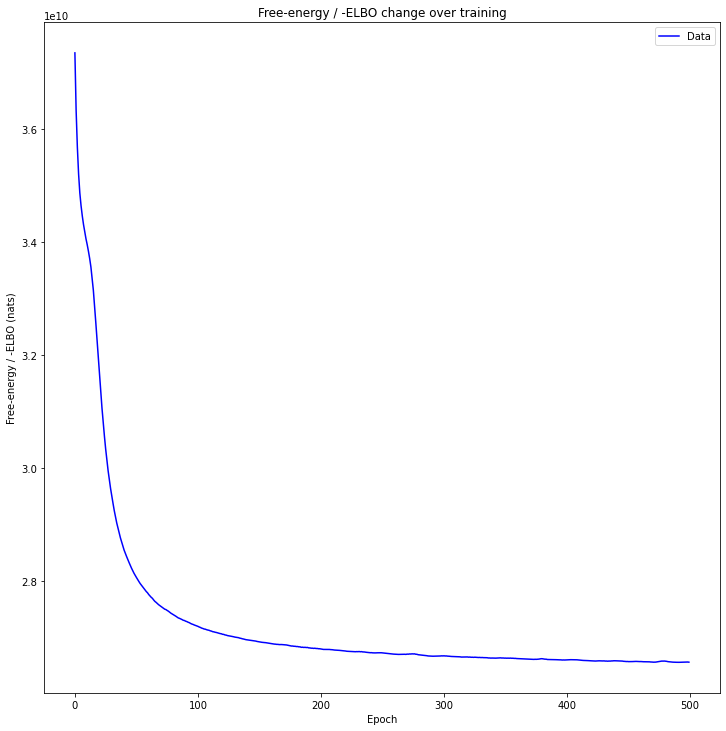

In [14]:
utils.plot_losses(losses)

In [15]:
len(dtfa.subjects())

6

In [16]:
def task_labeler(task):
    if 'Heights' in task:
        return 'Heights'
    elif 'Social' in task:
        return 'Social threat'
    elif 'Spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


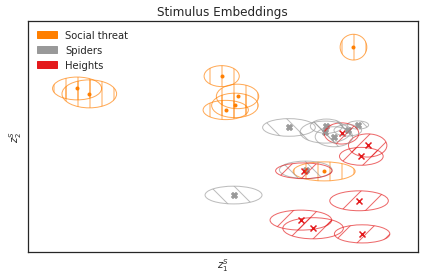

In [17]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='avfp_norest_task_embedding.pdf')

In [18]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/zulqarnain/Code/ntfa_methods_rewrited_batching/htfatorch/htfa_torch/utils.py:153: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


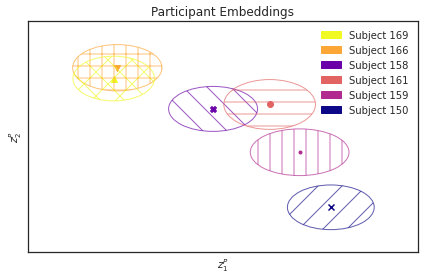

In [19]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [20]:
def block_task_labeler(b):
    task = b['task']
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

10/20/2021 14:22:34 Plotting factors for Participant 166, run 1


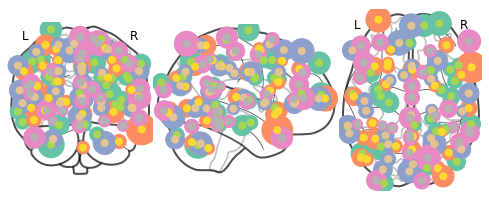

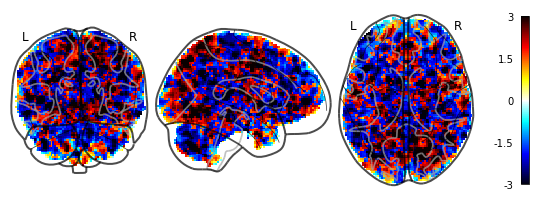

10/20/2021 14:22:42 Reconstruction Error (Frobenius Norm): 5.00847992e+02 out of 4.37333679e+02


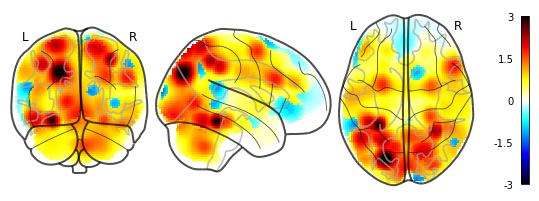

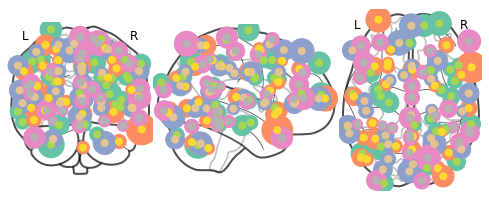

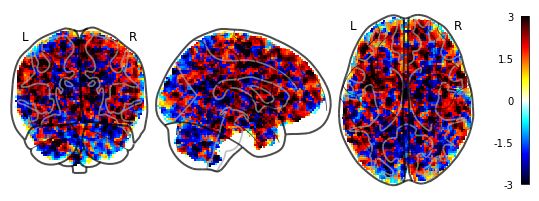

10/20/2021 14:22:53 Reconstruction Error (Frobenius Norm): 4.60108856e+02 out of 4.22695587e+02


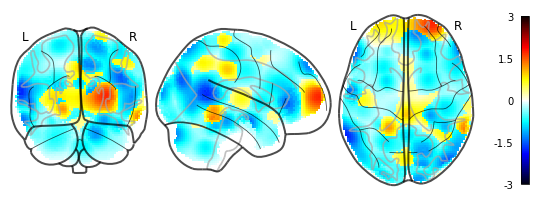

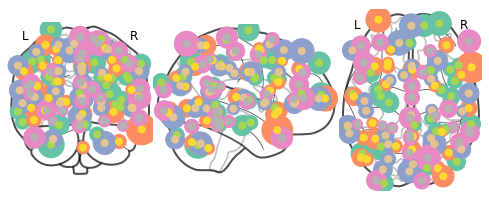

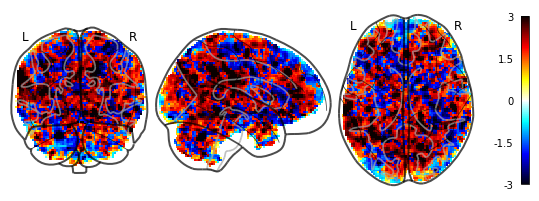

10/20/2021 14:23:05 Reconstruction Error (Frobenius Norm): 4.30859985e+02 out of 4.22085144e+02


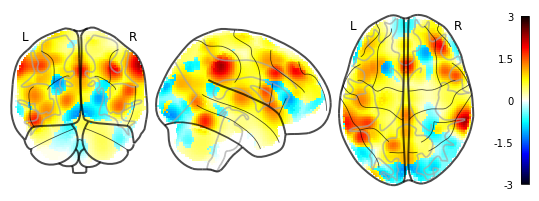

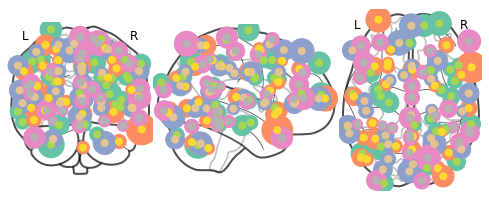

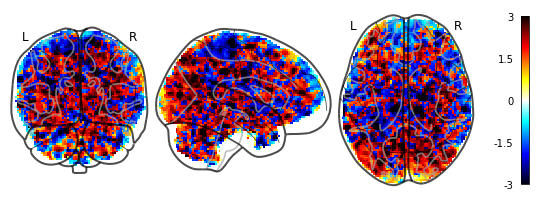

10/20/2021 14:23:17 Reconstruction Error (Frobenius Norm): 4.27985260e+02 out of 4.00315979e+02


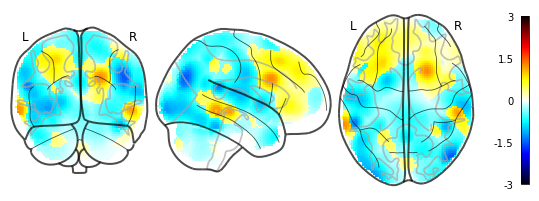

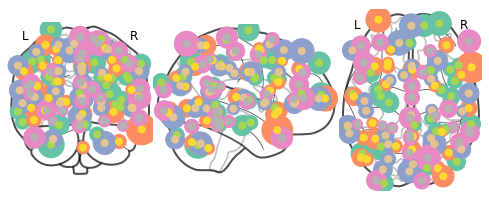

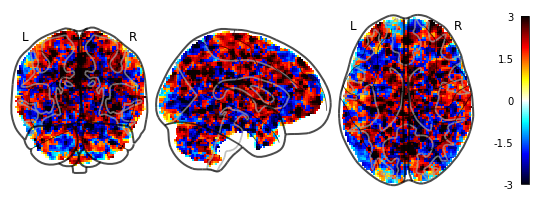

10/20/2021 14:23:30 Reconstruction Error (Frobenius Norm): 4.47622528e+02 out of 4.22615753e+02


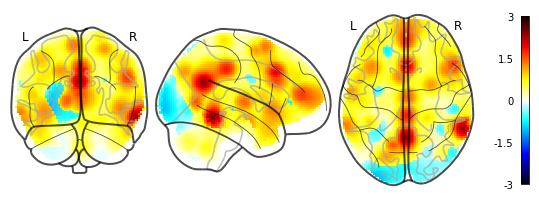

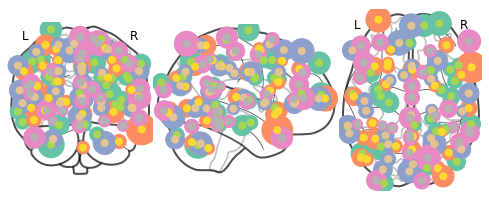

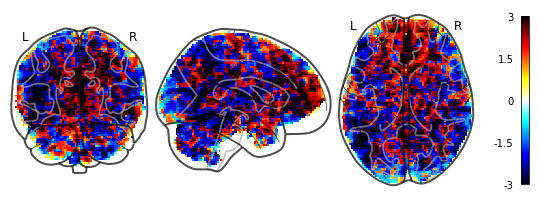

10/20/2021 14:23:44 Reconstruction Error (Frobenius Norm): 4.65838348e+02 out of 4.48799133e+02


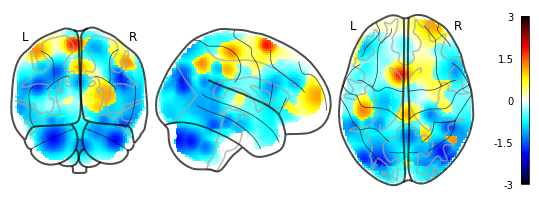

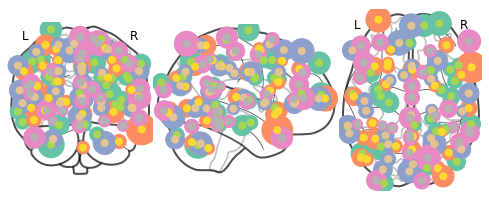

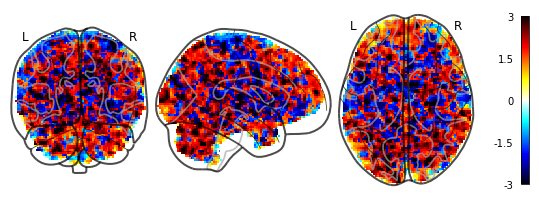

10/20/2021 14:23:58 Reconstruction Error (Frobenius Norm): 4.72065704e+02 out of 3.97955963e+02


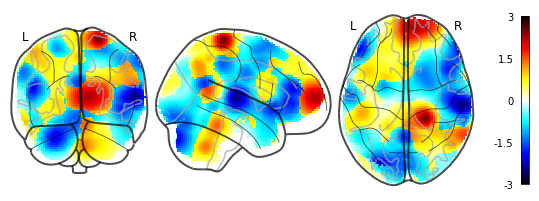

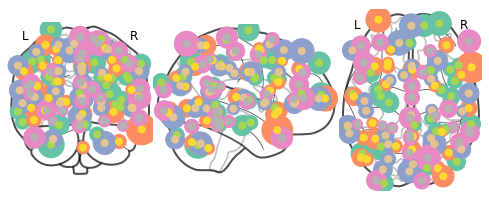

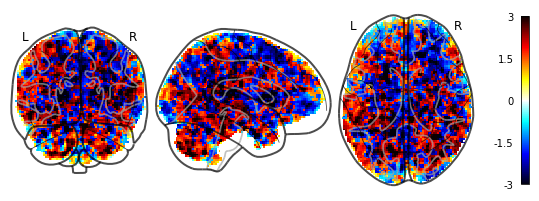

10/20/2021 14:24:13 Reconstruction Error (Frobenius Norm): 4.61329041e+02 out of 4.01981628e+02


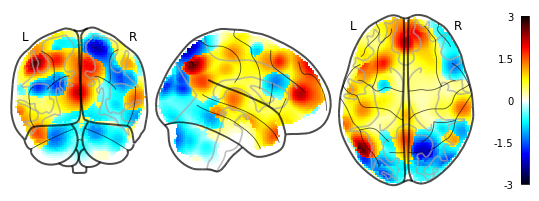

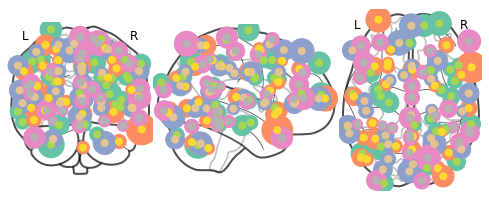

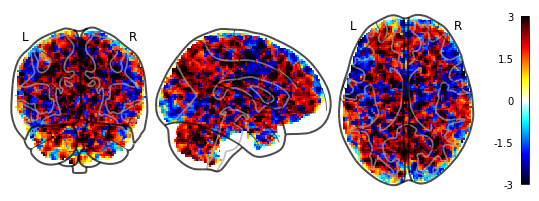

10/20/2021 14:24:31 Reconstruction Error (Frobenius Norm): 4.45927338e+02 out of 4.30525665e+02


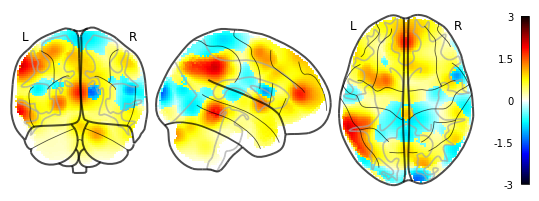

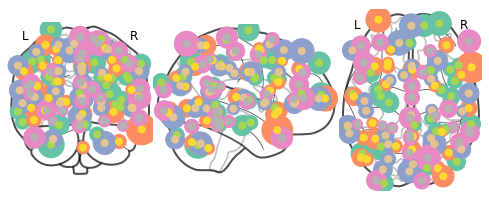

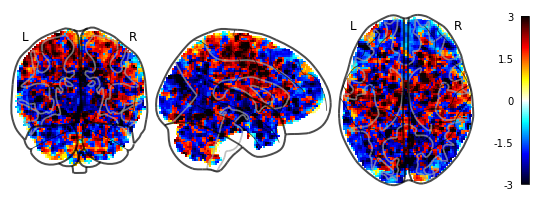

10/20/2021 14:24:49 Reconstruction Error (Frobenius Norm): 4.41761536e+02 out of 4.14106384e+02


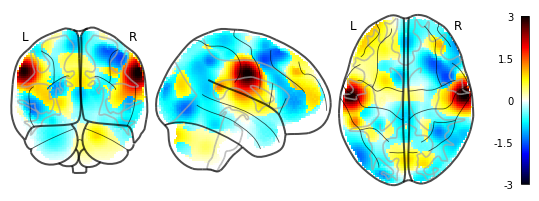

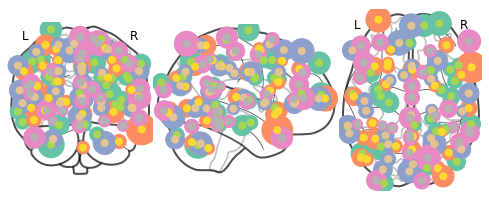

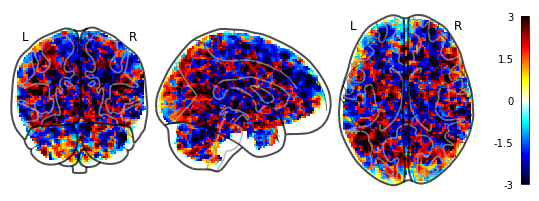

10/20/2021 14:25:07 Reconstruction Error (Frobenius Norm): 4.72379456e+02 out of 4.10976227e+02


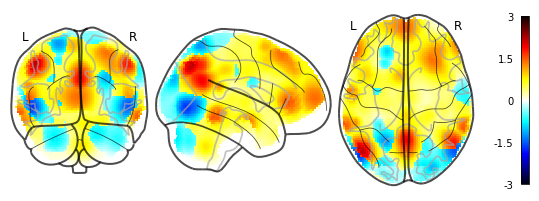

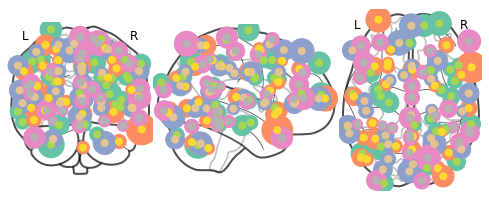

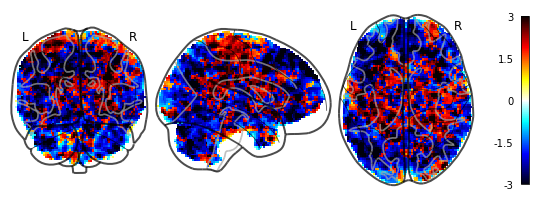

10/20/2021 14:25:28 Reconstruction Error (Frobenius Norm): 4.61218597e+02 out of 4.45168182e+02


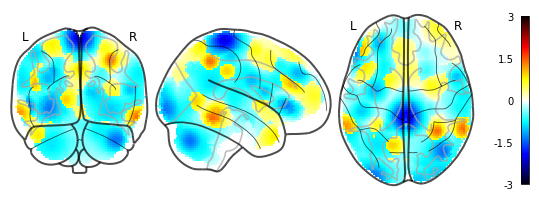

In [21]:
subject_runs = affvids_db.subject_runs()

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in affvids_db.blocks.values() if block['subject'] == subject and block['run'] == run]
    blocks.sort(key=lambda b: b['times'][0])
    for block in blocks:
        index = block['id']
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)

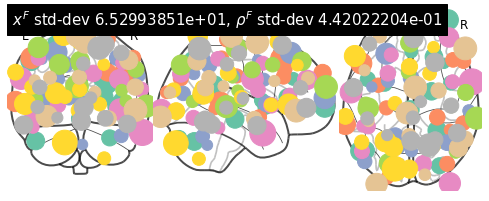

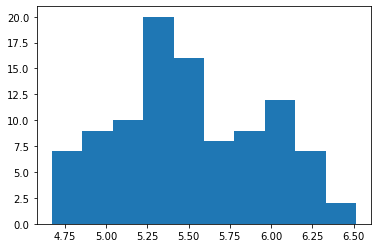

(<nilearn.plotting.displays.OrthoProjector at 0x7f29ff5eab50>,
 tensor([[ 2.8613e+01, -4.8198e+01,  2.2222e+01],
         [ 2.5213e+01,  2.9237e+01,  9.1689e+00],
         [-4.4438e+01,  5.7024e+00, -7.2690e-01],
         [-4.6770e+01, -6.9149e+01, -3.7175e+01],
         [-2.6455e+01,  5.7029e-01,  6.5674e+01],
         [-5.1927e+01, -6.9842e+01,  4.7235e+01],
         [ 3.5917e+01,  2.2413e+01,  1.4793e+00],
         [ 3.1057e+01, -8.5337e+01, -3.4030e+01],
         [ 4.3064e+01,  1.8545e+00,  5.9841e+00],
         [ 1.3428e+00,  3.4918e+01,  2.8693e+01],
         [ 2.2635e+01, -7.0547e+00,  2.9173e+01],
         [ 4.0258e+01,  6.8108e+01, -1.0434e+00],
         [ 2.4220e-01, -2.6299e+01, -1.3817e+01],
         [-2.3981e+01, -9.8054e+01,  1.4547e+01],
         [-2.4898e+01, -2.4469e+01,  3.1740e+01],
         [ 2.8692e+01, -3.4332e+01,  7.0214e+01],
         [ 4.2107e+01, -4.7613e+01, -2.9691e+00],
         [-6.8000e+01, -4.1808e+01,  4.2834e+00],
         [-3.3415e+01, -6.1816e-01, -

In [22]:
dtfa.visualize_factor_embedding()

In [23]:
self = dtfa
hyperparams = self.variational.hyperparams.state_vardict()
tasks = self.tasks()
subjects = self.subjects()
z_p_mu = hyperparams['subject_weight']['mu'].data
z_s_mu = hyperparams['task']['mu'].data
interactions = OrderedSet(list(itertools.product(subjects, tasks)))
z_ps_mu = np.zeros(shape=(len(interactions),2))
count = 0
for p in range (len(subjects)):
    for t in range(len(tasks)):
        joint_embed = torch.cat((z_p_mu[p], z_s_mu[t]), dim=-1)
        interaction_embed = self.decoder.interaction_embedding(joint_embed)# + \
#         self.decoder.interaction_embedding_skip(joint_embed)
        z_ps_mu[count,:] = interaction_embed.data.numpy()
#             interaction_embed = self.decoder.interaction_embedding(
#                 joint_embed).data
#             z_ps_mu[count,:] = self.decoder.interaction_embedding_out(torch.cat((interaction_embed,
#                                                                                  joint_embed),dim=-1)).data.numpy()
        count += 1
embedding_name = 'z^{PS}'

In [24]:
z_ps_mu

array([[ 2.48597383e-01,  9.79981422e-01],
       [ 2.47321606e-01,  1.01311958e+00],
       [ 2.48552039e-01,  1.06129599e+00],
       [ 2.50283003e-01,  1.03231120e+00],
       [ 2.49742687e-01,  1.03554952e+00],
       [ 2.50186026e-01,  1.01855659e+00],
       [ 2.48692364e-01,  1.02556348e+00],
       [ 2.47588515e-01,  1.09514058e+00],
       [ 2.47287542e-01,  1.09703338e+00],
       [ 2.69824982e-01,  1.17213309e+00],
       [ 2.49363959e-01,  1.04331183e+00],
       [ 2.48264611e-01,  1.03434587e+00],
       [ 2.49947160e-01,  1.03426147e+00],
       [ 2.29844779e-01,  1.07581592e+00],
       [ 2.49502391e-01,  1.03732574e+00],
       [ 2.49852151e-01,  1.01630080e+00],
       [ 2.46081740e-01,  1.05417264e+00],
       [ 2.48205319e-01,  1.03469348e+00],
       [ 2.49065876e-01,  9.96667147e-01],
       [ 2.63912201e-01,  1.16459894e+00],
       [ 2.47800201e-01,  1.09816349e+00],
       [ 2.03050792e-01,  9.60172117e-01],
       [ 2.47487709e-01,  1.00400710e+00],
       [ 2.

In [25]:
import pickle
filename = PREFIX +  '.dat'
tensors = {
    'z': {'mu': z_ps_mu},
    'labels': list(interactions),
}
filename = open(filename,'wb')
pickle.dump(tensors, filename)
filename.close()

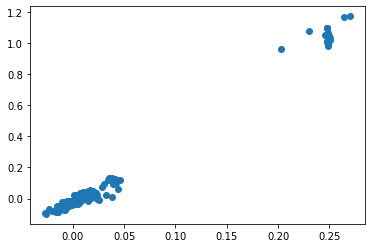

In [26]:
import matplotlib.pyplot as plt
plt.scatter(z_ps_mu[:,0], z_ps_mu[:,1])